In [1]:
import pandas as pd  # Imports the Pandas library for data manipulation and analysis.
import matplotlib.pyplot as plt  # Imports Matplotlib for creating plots and visualizations.
import numpy as np  # Imports NumPy for mathematical operations and array manipulations.
import datetime  # Imports the datetime module to work with dates.

# Gets the current date in the "YYYYMMDD" format
current_date = datetime.date.today().strftime("%Y%m%d")

# Defines the base path, which is likely used for storing or accessing files.
# The '{}' in the path suggests that it will be formatted with a value later,
# possibly the current date or another identifier.
base_path = '/home/helder-braga/Documentos/PSCs Resuls/PSCs Resuls/IxV/Estabilidade/Teste de Estabilidade1/20230728/{}/Files/'

#############################################################################################################################################

# Constructs the file path for the Excel file corresponding to Cell 1 in the forward direction.
# The file path is dynamically generated using the base path and the current date.
path_fwd84 = base_path.format(current_date) + 'D8_C4_27_Fwd.xls'

#############################################################################################################################################

# Reads the Excel file corresponding to Cell 1 in the forward direction into a Pandas DataFrame.
# The file is assumed to be in a tabular format and is read using the 'windows-1252' encoding to handle special characters.
df_fwd84 = pd.read_table(path_fwd84, encoding='windows-1252')

#############################################################################################################################################

# Extracts the voltage and current density values from the DataFrame as NumPy arrays.
# These values will be used for further analysis and calculations related to the photovoltaic cell.
potential_fwd84 = df_fwd84['Voltage (V)'].values
current_fwd84 = df_fwd84['Current density (mA/cm²)'].values

###################################################################################################################################################

# Filters the DataFrame to remove negative current density values.
Jp_fwd84 = df_fwd84[df_fwd84['Current density (mA/cm²)'] >= 0]  

# Filters the DataFrame to remove negative voltage values.
Vp_fwd84 = df_fwd84[df_fwd84['Voltage (V)'] >= 0]  

# Selects the lowest (last) value of current density after filtering.
J_Min_fwd84 = Jp_fwd84['Current density (mA/cm²)'].iloc[-4]  

# Selects the lowest (first) value of voltage after filtering.
V_Min_fwd84 = Vp_fwd84['Voltage (V)'].iloc[0]  

# Determines the open-circuit voltage (VOC), which corresponds to the voltage at the lowest current density.
VOC_fwd84 = Jp_fwd84.loc[Jp_fwd84['Current density (mA/cm²)'] == J_Min_fwd84, 'Voltage (V)'].values[0]  

# Determines the short-circuit current density (JSC), which corresponds to the current density at the lowest voltage.
JSC_fwd84 = Vp_fwd84.loc[Vp_fwd84['Voltage (V)'] == V_Min_fwd84, 'Current density (mA/cm²)'].values[0]  

#############################################################################################################################################

# Calculation of photovoltaic parameters

# Computes the power output at each voltage-current pair.
power_fwd84 = current_fwd84 * potential_fwd84  

# Determines the maximum power point (Pmax), which is the highest power output observed.
power_max_fwd84 = max(power_fwd84)  

# Calculates the power conversion efficiency (PCE) as the ratio of maximum power to the input power (assumed to be 420 mW/cm²).
efficiency_fwd84 = (power_max_fwd84 / 420) * 400  

# Computes the ideal power, which is the product of open-circuit voltage (VOC) and short-circuit current density (JSC).
power_ideal_fwd84 = VOC_fwd84 * JSC_fwd84  

# Calculates the fill factor (FF), which indicates the quality of the solar cell by comparing the actual maximum power to the ideal power.
ff_fwd84 = power_max_fwd84 / power_ideal_fwd84  

#############################################################################################################################################

# Creating a dictionary called 'dados_fwd1' that stores performance parameters of four different cells
dados_fwd4 = {
    'Células': ['4'],  # List of cell identifiers (strings representing cells 1 to 4)
    
    'VOC': [VOC_fwd84],  # Open-circuit voltage values for each cell
    
    'JSC': [JSC_fwd84],  # Short-circuit current density values for each cell
    
    'Pid': [power_ideal_fwd84],  
    # Ideal power values for each cell
    
    'Pmax': [power_max_fwd84],  
    # Maximum power values for each cell
    
    'ff': [ff_fwd84],  # Fill factor values for each cell
    
    'PCE': [efficiency_fwd84]  
    # Power conversion efficiency (PCE) values for each cell
}

# Converting the dictionary into a pandas DataFrame
VF_fwd4 = pd.DataFrame(dados_fwd4)

#############################################################################################################################################

# Calculate the mean and standard deviation for VOC, JSC, Pid, Pmax, ff, and PCE

# The following line is commented out because 'Células' is a categorical variable, 
# and calculating its mean or standard deviation is not applicable.
# average_C1 = VF_fwd1['Células'].mean()
# desvio_padrao_C1 = VF_fwd1['Células'].std()

average_VOC_fwd4 = VF_fwd4['VOC'].mean()
standard_deviation_VOC_fwd4 = VF_fwd4['VOC'].std()

average_JSC_fwd4 = VF_fwd4['JSC'].mean()
standard_deviation_JSC_fwd4 = VF_fwd4['JSC'].std()

average_Pid_fwd4 = VF_fwd4['Pid'].mean()
standard_deviation_Pid_fwd4 = VF_fwd4['Pid'].std()

average_Pmax_fwd4 = VF_fwd4['Pmax'].mean()
standard_deviation_Pmax_fwd4 = VF_fwd4['Pmax'].std()

average_ff_fwd4 = VF_fwd4['ff'].mean()
standard_deviation_ff_fwd4 = VF_fwd4['ff'].std()

average_PCE_fwd4 = VF_fwd4['PCE'].mean()
standard_deviation_PCE_fwd4 = VF_fwd4['PCE'].std()

#############################################################################################################################################

# Create a new dictionary including the original data plus the mean and standard deviation
dados_fwd4_full = {
    'Células': ['4', 'Mean', 'Standard Deviation'],  # Labels for additional statistics
    
    'VOC': [VOC_fwd84, average_VOC_fwd4, standard_deviation_VOC_fwd4],  
    # Open-circuit voltage (original values + mean + std dev)
    
    'JSC': [JSC_fwd84, average_JSC_fwd4, standard_deviation_JSC_fwd4],  
    # Short-circuit current density
    
    'Pid': [power_ideal_fwd84, average_Pid_fwd4, standard_deviation_Pid_fwd4],  
    # Ideal power values
    
    'Pmax': [power_max_fwd84, average_Pmax_fwd4, standard_deviation_Pmax_fwd4],  
    # Maximum power values
    
    'ff': [ff_fwd84, average_ff_fwd4, standard_deviation_ff_fwd4],  
    # Fill factor
    
    'PCE': [efficiency_fwd84, average_PCE_fwd4, standard_deviation_PCE_fwd4]  
    # Power conversion efficiency (PCE)
}


#############################################################################################################################################

# Convert the dictionary into a pandas DataFrame
VF_fwd4_full = pd.DataFrame(dados_fwd4_full)

# Print the full DataFrame with statistics
#print(VF_fwd1_full)


In [2]:
VF_fwd4_full

,Células,VOC,JSC,Pid,Pmax,ff,PCE
0,4,0.925027,23.688514,21.912522,13.908677,0.634736,13.246359
1,Mean,0.925027,23.688514,21.912522,13.908677,0.634736,13.246359
2,Standard Deviation,NaN,NaN,NaN,NaN,NaN,NaN


# Graph of current density versus potential

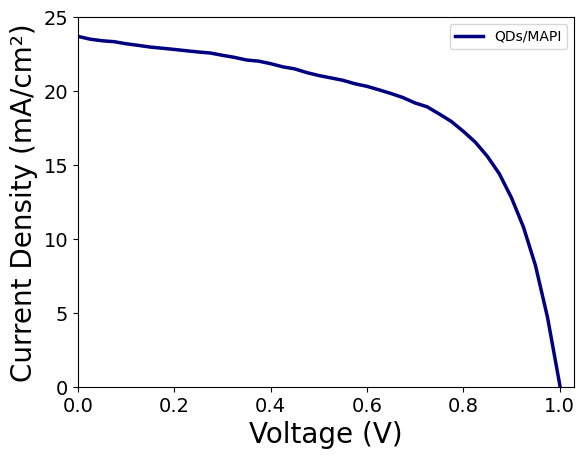

In [3]:
import matplotlib.pyplot as plt  # Importing the Matplotlib library

# Plot line and point graphs

# Uncomment one of the following styles to change the graph's appearance
# plt.style.use('ggplot')
# plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')
# plt.style.use('default')

# Plot the voltage vs. current density curve
plt.plot(potential_fwd84, current_fwd84, color="navy", linewidth=2.5, linestyle="-")  
# Blue solid line representing forward voltage-current behavior

# Uncomment the following line to add a second curve for reverse current
# plt.plot(tensao_rev101, corrente_rev101, color="red", linewidth=2.5, linestyle="--")  
# Dashed red line for reverse current behavior

# Set axis limits
plt.xlim(0, 1.03)  # X-axis range from 0 to 1.03 V
plt.ylim(0, 25)  # Y-axis range from 0 to 25 mA/cm²

# Add legend
plt.legend(['QDs/MAPI'])  # Label for the plotted curve

# Set tick label size for better readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Axis labels
plt.xlabel("Voltage (V)", fontsize=20)  # X-axis label
plt.ylabel("Current Density (mA/cm²)", fontsize=20)  # Y-axis label

# Uncomment the following line to add a title
# plt.title("MAPI_D10_C1")

# Set transparent background for the graph
plt.gca().set_facecolor('none')  # Remove background color from plot area
plt.gcf().set_alpha(0)  # Set figure transparency

# Save the plot to the notebook's directory
plt.savefig('IxV QDs_MAPI.png', transparent=True, bbox_inches='tight')  
# Saves the figure with transparency and removes extra white space

# Uncomment the following line to save with a different name
# plt.savefig('IxV_D10_C1.png')

# Display the plot
plt.show()
